In [ ]:
!apt-get install openjdk-8-jdk-headless


Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libxtst6 amd64 2:1.2.3-1 [12.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jre-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [28.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jdk-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [8,282 kB]
Fetched 36.5 MB in 49s (740 kB/s)
Sel

In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-05-17 17:02:04--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  99.9KB/s    in 44m 27s 

2023-05-17 17:46:31 (99.8 KB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [ ]:
!tar xf spark-3.2.1-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("DataCleaningApp")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
!pip install pyspark
!pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd 
pinkFlam = pd.read_csv ("/content/combined-data.csv")
pinkFlam = pinkFlam.rename(columns=lambda x: x.strip()) #removes whitespaces from headers if exists

In [ ]:
#pinkFlam.fillna(pinkFlam.mean(), inplace=True)
print('Samples with Purchases : ' + str(pinkFlam['count_gameclicks'].count()) + ' from  the total samples : ' + str(pinkFlam['userId'].count())) 

Samples with Purchases : 4619 from  the total samples : 4619


In [ ]:
pinkFlam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userId            4619 non-null   int64  
 1   userSessionId     4619 non-null   int64  
 2   teamLevel         4619 non-null   int64  
 3   platformType      4619 non-null   object 
 4   count_gameclicks  4619 non-null   int64  
 5   count_hits        4619 non-null   int64  
 6   count_buyId       1411 non-null   float64
 7   avg_price         1411 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 288.8+ KB


array([[<Axes: title={'center': 'count_gameclicks'}>]], dtype=object)

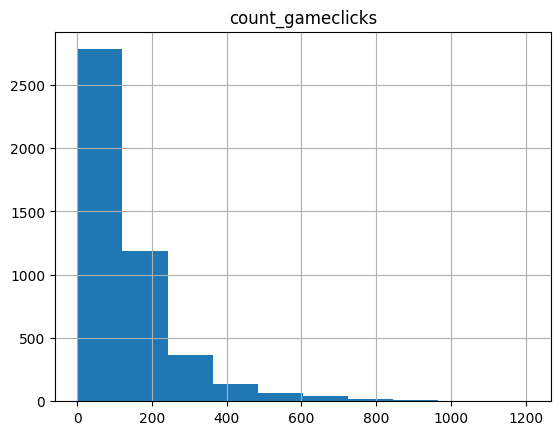

In [ ]:
#descrptive analysis
from matplotlib import pyplot
pd.DataFrame.hist(pinkFlam[['count_gameclicks']])

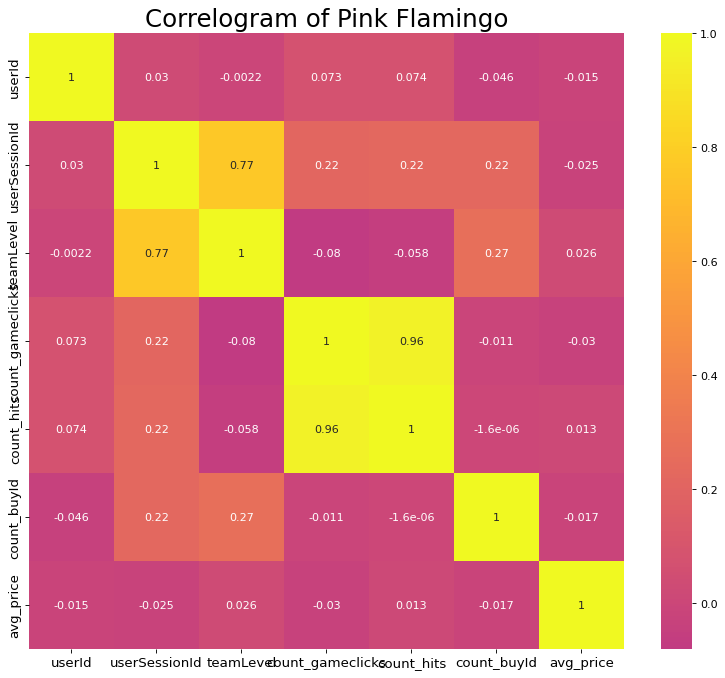

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(pinkFlam.corr(), xticklabels=pinkFlam.corr().columns, yticklabels=pinkFlam.corr().columns, cmap='plasma', center=0, annot=True)

# Decorations
plt.title('Correlogram of Pink Flamingo', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
corr = pinkFlam.corr()
corr

,userId,userSessionId,teamLevel,count_gameclicks,count_hits,count_buyId,avg_price
userId,1.000000,0.030163,-0.002158,0.072707,0.073603,-0.045570,-0.015360
userSessionId,0.030163,1.000000,0.765534,0.216295,0.221440,0.219281,-0.024990
teamLevel,-0.002158,0.765534,1.000000,-0.080415,-0.058090,0.270753,0.025648
count_gameclicks,0.072707,0.216295,-0.080415,1.000000,0.959317,-0.010759,-0.030101
count_hits,0.073603,0.221440,-0.058090,0.959317,1.000000,-0.000002,0.013463
count_buyId,-0.045570,0.219281,0.270753,-0.010759,-0.000002,1.000000,-0.017451
avg_price,-0.015360,-0.024990,0.025648,-0.030101,0.013463,-0.017451,1.000000


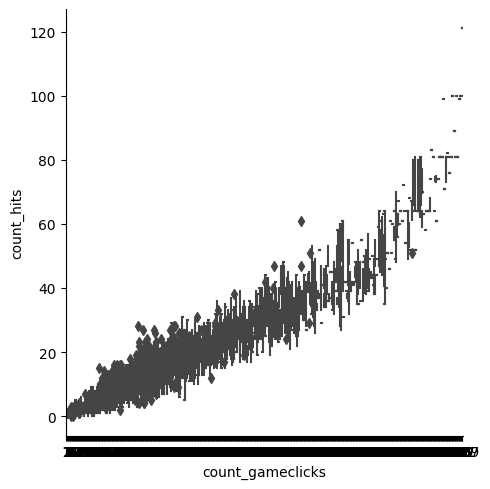

In [ ]:
sns.catplot(x="count_gameclicks",y="count_hits",kind='box',data=pinkFlam)

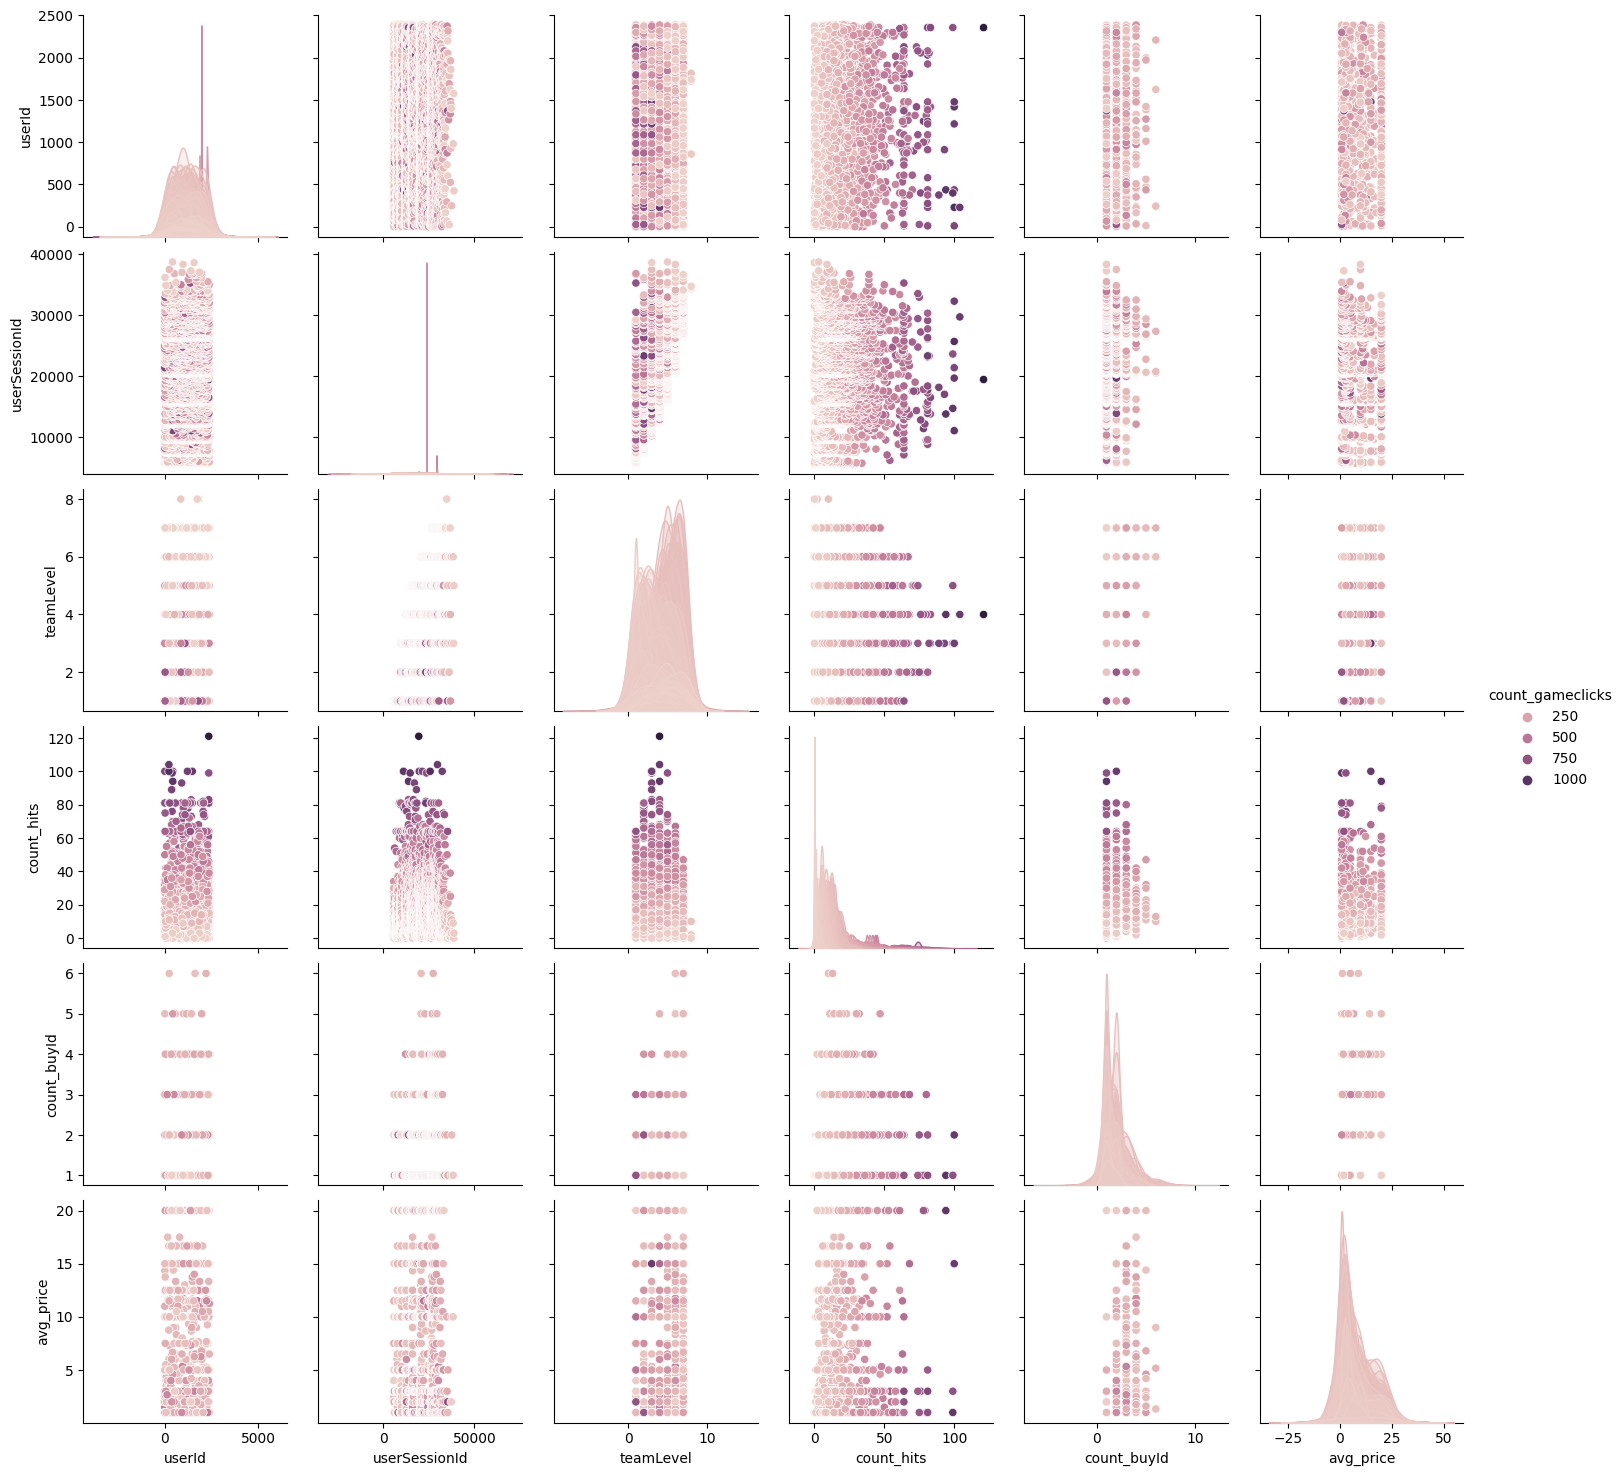

In [ ]:
sns.pairplot(data=pinkFlam, hue = "count_gameclicks")

In [ ]:
pinkFlam.replace("", np.nan, inplace=True)
pinkFlam = pinkFlam[np.isfinite(pinkFlam['count_buyId'])]
pinkFlam['user_category'] = np.where(pinkFlam['avg_price']> 5, 'HighRollers', 'PennyPinchers')
pinkFlam.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price,user_category
4,937,5652,1,android,39,0,1.0,1.0,PennyPinchers
11,1623,5659,1,iphone,129,9,1.0,10.0,HighRollers
13,83,5661,1,android,102,14,1.0,5.0,PennyPinchers
17,121,5665,1,android,39,4,1.0,3.0,PennyPinchers
18,462,5666,1,android,90,10,1.0,3.0,PennyPinchers


<Axes: xlabel='count_gameclicks', ylabel='platformType'>

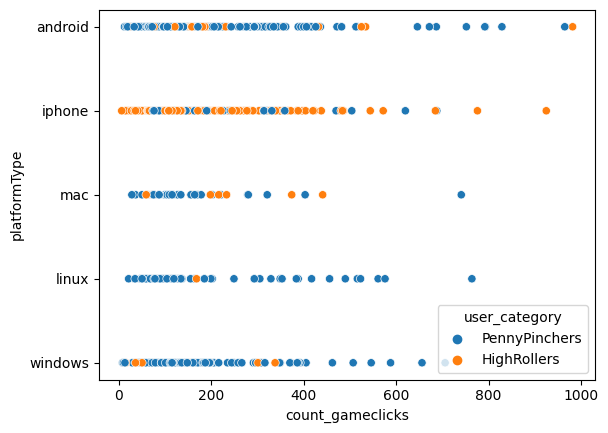

In [ ]:
sns.scatterplot(x='count_gameclicks',y='platformType',hue='user_category',data=pinkFlam)

<Axes: xlabel='count_gameclicks', ylabel='count'>

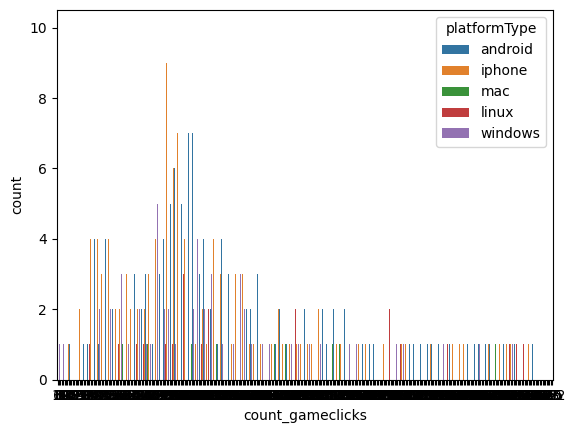

In [ ]:
import seaborn as sns
sns.countplot(x="count_gameclicks", hue="platformType", data=pinkFlam)

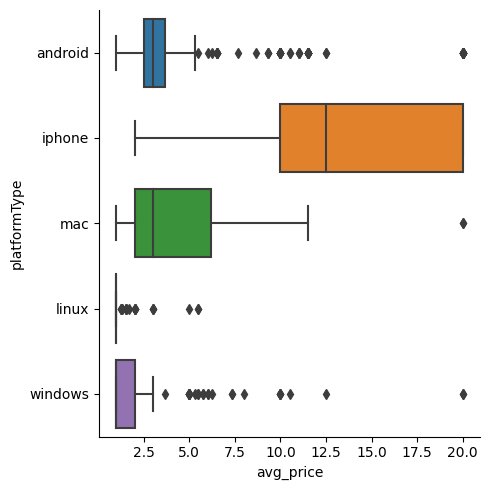

In [ ]:
sns.catplot(x="avg_price",y="platformType",kind='box',data=pinkFlam)

In [ ]:
#data preparing for model 
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(pinkFlam['avg_price'])
print ("Categorical classes:", label_encoder.classes_)
integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)
t = label_encoder.transform(pinkFlam['avg_price'])
pinkFlam['Encavg_price'] = t
# pinkFlam[['OS1', 'OS2', 'OS3', 'OS4' , 'OS5']] = pd.get_dummies(pinkFlam['platformType'])

Categorical classes: [ 1.    1.25  1.33  1.5   1.6   1.67  1.75  2.    2.33  2.4   2.5   2.6
  2.67  2.75  3.    3.25  3.33  3.5   3.67  4.    4.2   4.33  4.6   4.67
  5.    5.17  5.25  5.33  5.5   5.75  6.    6.25  6.5   6.67  6.8   7.33
  7.5   7.67  8.    8.33  8.67  8.75  9.    9.25  9.33 10.   10.5  10.67
 11.   11.25 11.5  11.67 11.75 12.5  13.   13.33 13.75 14.   14.33 14.4
 15.   16.67 17.5  20.  ]
Integer classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors

clf = tree.DecisionTreeClassifier()

clf1 = svm.SVC()
clf2 = GaussianNB()
clf3 = neighbors.KNeighborsClassifier()

X = pinkFlam[['teamLevel' ,'count_gameclicks' , 'count_hits','count_buyId' , 'EncPlatformType']][0:846]

Y = pinkFlam['user_category'][0:846]


#CHALLENGE - ...and train them on our data
clf = clf.fit(X , Y)

#Support Vector classifier
clf1 = clf1.fit(X,Y)

#Naive Bayes
clf2 = clf2.fit(X,Y)

#K neighbors classifier
clf3 = clf3.fit(X,Y)

#test data
X_test = pinkFlam[['teamLevel' ,'count_gameclicks' , 'count_hits','count_buyId' , 'EncPlatformType']][846:1411]

Y_test = pinkFlam['user_category'][846:1411]


Y_prediction  = clf.predict(X_test)
Y_prediction1 = clf1.predict(X_test)
Y_prediction2 = clf2.predict(X_test)
Y_prediction3 = clf3.predict(X_test)

#CHALLENGE compare their reusults and print the best one!

print("Prediction for Naive Bayes : ",Y_prediction2)

print("Accuracy for Decision Tree : ",accuracy_score(Y_test,Y_prediction))

print("Accuracy for SVM : ",accuracy_score(Y_test,Y_prediction1))

print("Accuracy for K neighbors : ",accuracy_score(Y_test,Y_prediction3))

Prediction for Naive Bayes :  ['PennyPinchers' 'HighRollers' 'HighRollers' 'PennyPinchers' 'HighRollers'
 'PennyPinchers' 'PennyPinchers' 'HighRollers' 'PennyPinchers'
 'HighRollers' 'PennyPinchers' 'HighRollers' 'HighRollers' 'PennyPinchers'
 'HighRollers' 'HighRollers' 'HighRollers' 'PennyPinchers' 'HighRollers'
 'HighRollers' 'PennyPinchers' 'HighRollers' 'HighRollers' 'PennyPinchers'
 'HighRollers' 'PennyPinchers' 'HighRollers' 'PennyPinchers' 'HighRollers'
 'PennyPinchers' 'PennyPinchers' 'HighRollers' 'PennyPinchers'
 'PennyPinchers' 'PennyPinchers' 'PennyPinchers' 'HighRollers'
 'PennyPinchers' 'PennyPinchers' 'PennyPinchers' 'HighRollers'
 'HighRollers' 'PennyPinchers' 'PennyPinchers' 'PennyPinchers'
 'HighRollers' 'PennyPinchers' 'PennyPinchers' 'PennyPinchers'
 'PennyPinchers' 'HighRollers' 'PennyPinchers' 'PennyPinchers'
 'PennyPinchers' 'HighRollers' 'PennyPinchers' 'PennyPinchers'
 'HighRollers' 'PennyPinchers' 'HighRollers' 'PennyPinchers'
 'PennyPinchers' 'HighRollers' '

In [ ]:
Y_prediction  = clf.predict(X_test)
np.unique(Y_prediction)
pinkFlam_evaluation = pinkFlam[846:1411]
pinkFlam_evaluation['Predicted_UserCategory'] = Y_prediction
pinkFlam_evaluation[['Predicted_UserCategory' , 'user_category' ]] 
y_true = pinkFlam_evaluation['user_category'] 
y_pred = pinkFlam_evaluation['Predicted_UserCategory']

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [ ]:
import numpy as np
unique_label = np.unique(y_true)
print(pd.DataFrame(confusion_matrix(y_true, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label]))

                    pred:HighRollers  pred:PennyPinchers
true:HighRollers                 176                  66
true:PennyPinchers                67                 256


Text(0.5, 23.52222222222222, 'Predicted User Category')

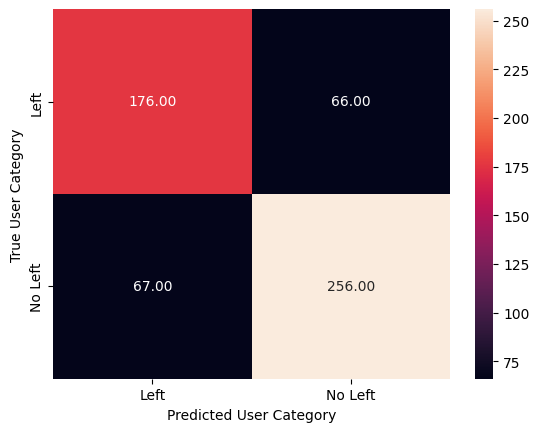

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label])

sns.heatmap(cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True User Category')
plt.xlabel('Predicted User Category')

In [ ]:
!pip install  pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


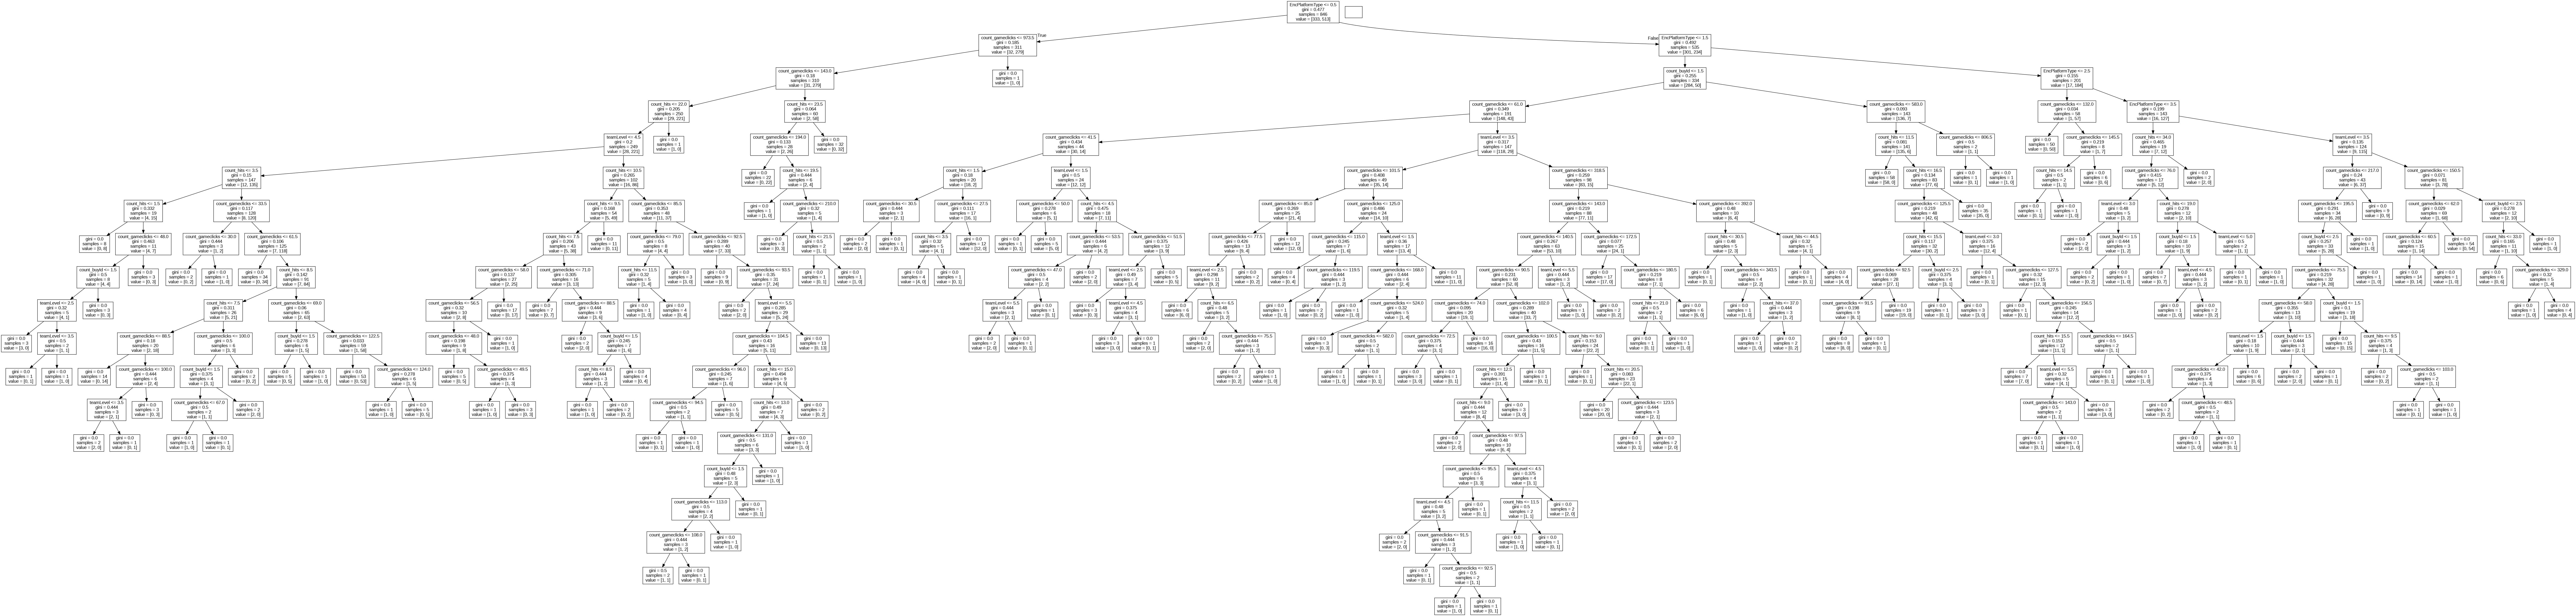

In [ ]:
# in commanda promopt : conda install -c conda-forge pydotplus or pip install pydotplus
import pydotplus as pdot
from sklearn.tree import export_graphviz

export_graphviz( clf,
              out_file = "pinkFlamingo_tree.odt",
              feature_names = X.columns )

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'pinkFlamingo_tree.odt' )
chd_tree_graph.write_jpg( 'pinkFlamingo_tree.jpg' )

from IPython.display import Image
Image(filename='pinkFlamingo_tree.jpg')

In [ ]:
import pandas as pd
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array

In [ ]:
adclicks_df = pd.read_csv("/content/buy-clicks.csv")
adclicks_df = adclicks_df.rename(columns=lambda x: x.strip()) #remove whitespaces from headers

In [ ]:
adclicks_df.head(5)

,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0


In [ ]:
adclicks_df['adCount'] = 1

In [ ]:

adclicks_df.head(5)

,timestamp,txId,userSessionId,team,userId,buyId,price,adCount
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0,1
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0,1
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0,1
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0,1
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0,1


In [ ]:
gameclicks_df = pd.read_csv("/content/level-events.csv")
gameclicks_df = gameclicks_df.rename(columns=lambda x: x.strip()) #remove whitespaces from headers

In [ ]:
gameclicks_df.head(5)

,timestamp,eventId,teamId,teamLevel,eventType
0,2016-05-27 23:06:54,0,2,1,end
1,2016-05-27 23:06:54,1,2,2,start
2,2016-05-27 23:06:54,2,8,1,end
3,2016-05-27 23:06:54,3,8,2,start
4,2016-05-27 23:06:54,4,9,1,end


In [ ]:
gameclicks_df['clickCount'] = 1

In [ ]:
gameclicks_df.head(5)

,timestamp,eventId,teamId,teamLevel,eventType,clickCount
0,2016-05-27 23:06:54,0,2,1,end,1
1,2016-05-27 23:06:54,1,2,2,start,1
2,2016-05-27 23:06:54,2,8,1,end,1
3,2016-05-27 23:06:54,3,8,2,start,1
4,2016-05-27 23:06:54,4,9,1,end,1


In [ ]:
buyclicks_df = pd.read_csv("/content/ad-clicks.csv")
buyclicks_df = buyclicks_df.rename(columns=lambda x: x.strip()) #removes whitespaces from headers

In [ ]:
buyclicks_df.head(5)

,timestamp,txId,userSessionId,teamId,userId,adId,adCategory
0,2016-05-26 15:13:22,5974,5809,27,611,2,electronics
1,2016-05-26 15:17:24,5976,5705,18,1874,21,movies
2,2016-05-26 15:22:52,5978,5791,53,2139,25,computers
3,2016-05-26 15:22:57,5973,5756,63,212,10,fashion
4,2016-05-26 15:22:58,5980,5920,9,1027,20,clothing


In [ ]:
user_purchases = buyclicks_df[['userId','txId']] #select only userid and price
user_purchases.head(5)

,userId,txId
0,611,5974
1,1874,5976
2,2139,5978
3,212,5973
4,1027,5980


In [ ]:
user_adclicks = adclicks_df[['userId','adCount']]

In [ ]:
user_adclicks.head(5)


,userId,adCount
0,1300,1
1,868,1
2,819,1
3,121,1
4,2222,1


In [ ]:
user_gameclicks = gameclicks_df[['userId','adCount']]
user_gameclicks.head(5) 

KeyError: ignored

In [ ]:
ads_per_user = user_adclicks.groupby('userId').sum()
ads_per_user = ads_per_user.reset_index()
ads_per_user.columns = ['userId', 'totalAdClicks'] #rename the columns

In [ ]:
ads_per_user.head(5)


,userId,totalAdClicks
0,1,9
1,8,5
2,9,6
3,10,10
4,12,13


In [ ]:
game_clicks_per_user = user_gameclicks.groupby('userId').sum()
game_clicks_per_user = game_clicks_per_user.reset_index()
game_clicks_per_user.columns = ['userId', 'totalGameClicks'] #rename the columns

NameError: ignored

In [ ]:
game_clicks_per_user.head(5)

NameError: ignored

In [ ]:
revenue_per_user = user_purchases.groupby('userId').sum()
revenue_per_user = revenue_per_user.reset_index()
revenue_per_user.columns = ['userId', 'revenue'] #rename the columns
revenue_per_user.head(5)

,userId,revenue
0,1,869399
1,8,323171
2,9,838817
3,10,508039
4,12,901659


In [ ]:
combined_df = ads_per_user.merge(game_clicks_per_user, on='userId') #userId, adCount, clickCount
combined_df = combined_df.merge(revenue_per_user, on='userId') #userId, adCount, clickCount, price
combined_df.head(5) #display how the merged table looks

NameError: ignored

In [ ]:
cluster_df = combined_df[['totalAdClicks', 'totalGameClicks','revenue']]
cluster_df.head(5)

NameError: ignored

In [ ]:
cluster_df.shape

NameError: ignored

In [ ]:
import pyspark
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
print('Spark',pyspark.__version__)
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

Spark 3.2.1


In [ ]:
sc = spark.sparkContext
sqlContext = SQLContext(sc)
p_df = sqlContext.createDataFrame(cluster_df)
parsed_data = p_df.rdd.map(lambda line: array([line[0], line[1], line[2]])) #totalAdClicks, totalGameClicks, revenue

NameError: ignored

In [ ]:
km_model = KMeans.train(parsed_data, 3, maxIterations=10, initializationMode="random")
headers = cluster_df.columns.values.tolist()
centers = [a.tolist() for a in km_model.centers]

NameError: ignored

In [ ]:
df = pd.DataFrame(centers, columns=headers)
df.head()


NameError: ignored

In [ ]:
%matplotlib inline
df.plot(kind='bar',subplots=True, figsize=(5,7), use_index=True)

NameError: ignored